<a href="https://colab.research.google.com/github/Angelysa5/Anal-tica/blob/main/Reto_3_M%C3%A9todos_de_Agrupaci%C3%B3n_Angely_Salazar_Arbel%C3%A1ez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Cargar las librerías de referencia para el modelo

In [ ]:
#!pip install seaborn
import pandas as pd               #Librería que permite comunicación con Excel
import numpy as np                #Librería que permite las funciones matemáticas
import matplotlib.pyplot as plt   #Librería que permite graficar
import seaborn as sns

#Para no tener que cargar el archivo
from google.colab import drive
drive.mount('/content/drive')

#Préstamo Interbibliotecario
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

Mounted at /content/drive


1.  Se cargan los archivos - Análisis A-priori

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


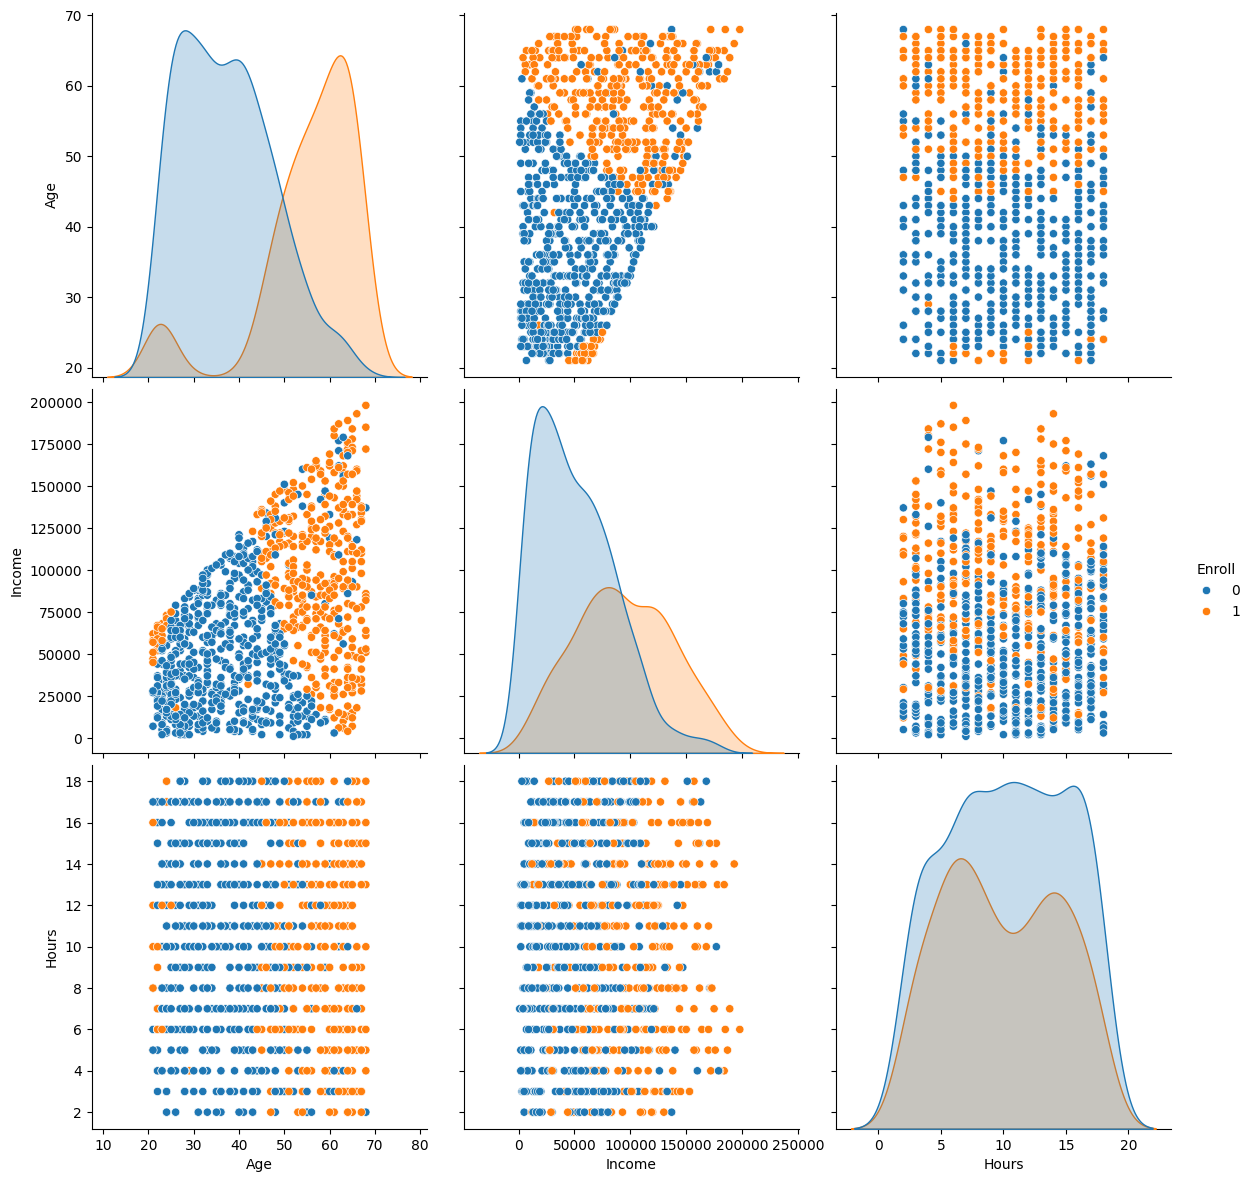

In [ ]:
nxl='/content/drive/MyDrive/3. BD1-GymData_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()
XDB.head(100) #Mostrar las primeras 10 filas

XDB=XDB[[ 'Age', 'Income', 'Hours','Enroll']]


sns.pairplot(XDB,hue='Enroll', size=4, vars=['Age', 'Income', 'Hours'])


**Determinar la variable que mejor lleva a cabo el proceso de caracterización de la inscripción de una persona al Gym**

Considerando los valores obtenidos de la matriz y el análisis de los gráficos de dispersión y las distribuciones, podemos concluir que la variable Age (Edad) es la que tiene la mayor correlación positiva (0.640433) con la variable Income(Inscripción al gimnasio). Esto sugiere que la edad de la persona es la variable que mejor caracteriza si una persona se inscribirá al gimnasio.


In [ ]:
#Para confirmar la buena correlación
corr=XDB.corr()
print("Esta es la matriz de correlación:\n",corr)


#Se procede con la configuración de los datos de entrada y de salida
#La f/n iloc es para llamar las variables de forma más simple #Apartir del 0 tráigame la columana hasta la 3,  es decir, toma las 1ras 3 variables

XD=np.array(XDB.iloc[:,0:3])     #Toma las variables de entrada: 'Age', 'Income', 'Hours'
yd=np.array(XDB.iloc[:,3])       #Toma las variables de salida, es decir, 'Enroll'

Esta es la matriz de correlación:
              Age    Income     Hours    Enroll
Age     1.000000  0.450562 -0.040133  0.644033
Income  0.450562  1.000000 -0.018196  0.476372
Hours  -0.040133 -0.018196  1.000000 -0.048184
Enroll  0.644033  0.476372 -0.048184  1.000000


**Según las variables de entrada y de salida, determinar cuales variables tienen una mayor correlación entre ellas**

Observando la matriz de correlación se puede reconocer que entre las variables Age e Income se tiene una correlación de 0.450562, entre las variables Age y Hours se tiene una correlación de -0.040133 y entre las variables de Income y Hours se obtuvo una correlación de -0.018196. **Esto evidencia que la mayor correlación entre variables de entrada es la relación entre Age (Edad) y Enroll con 0.644033** y por ende la edad es fundamental para garantizar si una persona se inscribirá o no al gym.

2. implementamos el modelo KNN

Esta es la matriz de confusión:
 [[538  59]
 [145 258]]

Exactitud:  0.796

Sensibilidad:  0.6401985111662531

Especificidad:  0.9011725293132329



Esta persona va a comprar una membresía:  [0]




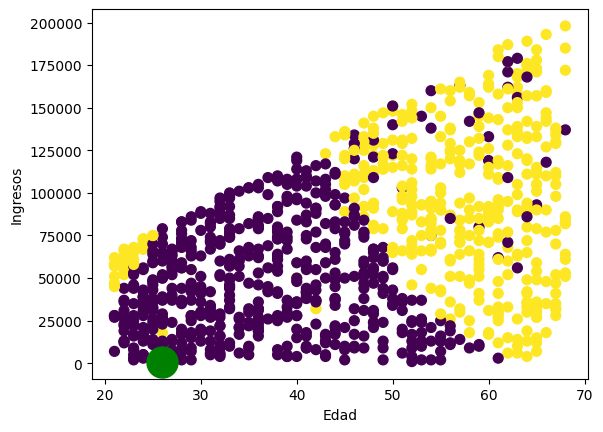

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=10) #Tomar 10 vecinos más cercanos a mi
mknn.fit(XD,yd)                           #Se ajusta el modelo

#Evaluamos el funcionamiento del modelo
ydp=mknn.predict(XD)

#Matriz de Confusión
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print("Esta es la matriz de confusión:\n",cm)
print()

VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]

Exac=(VP+VN)/(VP+VN+FP+FN)
Sen=VP/(VP+FN)
Esp=VN/(VN+FP)

print("Exactitud: ",Exac)
print()
print("Sensibilidad: ",Sen)
print()
print("Especificidad: ",Esp)
print()
print()
print()


#Modelo, ¿Una persona con estas características: "Age","Income","Hours"= 26,800,15 va a comprar una membresia?
XDP=np.array([(26,800,15)])
ydpp=mknn.predict(XDP)
print("Esta persona va a comprar una membresía: ",ydpp)
print()
print()

#Las variables siempre se hacen con las variables que tienen más correlación
plt.scatter(XD[:,0],XD[:,1],c=yd,s=50,cmap='viridis')
plt.scatter(XDP[:,0],XDP[:,1],marker='o',s=500,facecolors='green')
plt.xlabel('Edad'); plt.ylabel('Ingresos')
plt.show()

**Determinar el comportamiento del modelo KNN en el pronóstico de los datos utilizados para la configuración del modelo en cuanto a exactitud, sensibilidad y especificidad**


Con respecto a las métricas se puede observar que este modelo tiene una tendencia a clasificar mejor los negativos porque la Especificidad es la que mejor porcentaje tiene al alcanzar un 90.1% de certeza.

Analizando en conjunto, se puede observar que el modelo logró una Exactitud del 79.6% lo cual es un excelente indicador ya que supera el mínimo 75% esperado para poder ser determinado como un buen porcentaje de exactitud que a su vez lo convierte en un buen modelo.

Además, se obtuvo una certeza de clasificación de los positivos de un 64% como se puede observar en el indicador de Sensibilidad.

3. Se procede con la construcción del K-Means (Montoncitos de Datos - Clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


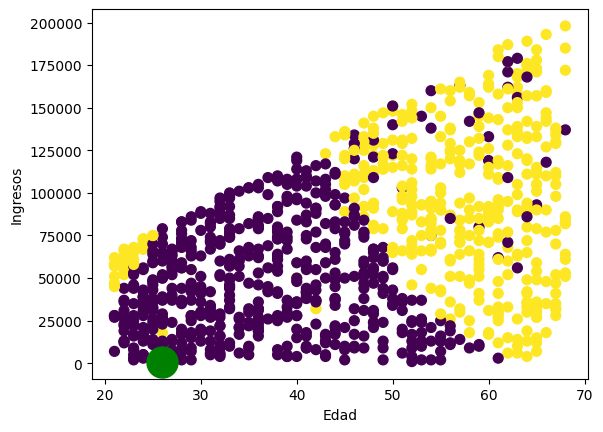




El participante estudiado de la base de datos del gym: está en el cluster:  [3]



El número de personas que NO se suscribirán y pertenecen al cluster 1 es: 130
El número de personas que SÍ se suscribirán y pertenecen al cluster 1 es: 116
El porcentaje que NO se suscribirán para el cluster 1 es: 0.5284552845528455
El porcentaje que SÍ se suscribirá para el cluster 1 es: 0.4715447154471545


El número de personas que NO se suscribirán y pertenecen al cluster 2 es: 172
El número de personas que SÍ se suscribirán y pertenecen al cluster 2 es: 66
El porcentaje que NO se suscribirán para el cluster 2 es: 0.7226890756302521
El porcentaje que SÍ se suscribirá para el cluster 2 es: 0.2773109243697479


El número de personas que NO se suscribirán y pertenecen al cluster 3 es: 50
El número de personas que SÍ se suscribirán y pertenecen al cluster 3 es: 107
El porcentaje que NO se suscribirán para el cluster 3 es: 0.3184713375796178
El porcentaje que SÍ se suscribirá para el cluster 3 es: 0.68

In [ ]:
np.random.seed(42) #Para que nos de el mismo modelo a todos


mkm=KMeans(n_clusters=5,init='random',random_state=42) #Relación (matriz de confusión) entre yd que son los datos originales de PreApr y ydp2 que son los datos pronosticados por el modelo
mkm.fit(XD,yd)
labels=mkm.labels_ #Dónde quedaron clasificados cada uno de los solicitantes de créditos
print()


#Se mapean los clusters - ¿Cómo quedaron clasificados los solicitantes?
plt.figure()
plt.scatter(XD[:,0],XD[:,1],c=yd,s=50,cmap='viridis')
plt.scatter(XDP[:,0],XDP[:,1],marker='o',s=500,facecolors='green') #para saber visualmente yo en dónde quedaría
plt.xlabel('Edad'); plt.ylabel('Ingresos')
plt.show()
print()
print()
print()


#¿Dónde quedé yo?
XDP=np.array([(26,800,15)])
ydpp2=mkm.predict(XDP)
print("El participante estudiado de la base de datos del gym: está en el cluster: ",ydpp2)
print()
print()
print()

#Todas las personas que pertenecen al cluster 1 y que no se suscribirán
c20=len(np.where((labels==0) & (yd==0)) [0])
print("El número de personas que NO se suscribirán y pertenecen al cluster 1 es:", c20)
#Todas las personas que pertenecen al cluster 2 y que se suscribirán
c21=len(np.where((labels==0) & (yd==1)) [0])
print("El número de personas que SÍ se suscribirán y pertenecen al cluster 1 es:", c21)

#¿Cuál es el porcentaje de No suscritos y suscritos del cluster 1?
c20=len(np.where((labels==0) & (yd==0)) [0])
c21=len(np.where((labels==0) & (yd==1)) [0])
print("El porcentaje que NO se suscribirán para el cluster 1 es:", c20/(c20+c21))
print("El porcentaje que SÍ se suscribirá para el cluster 1 es:", c21/(c20+c21))
print()
print()

#Todas las personas que pertenecen al cluster 2 y que no se suscribirán
c20=len(np.where((labels==1) & (yd==0)) [0])
print("El número de personas que NO se suscribirán y pertenecen al cluster 2 es:", c20)
#Todas las personas que pertenecen al cluster 2 y que se suscribirán
c21=len(np.where((labels==1) & (yd==1)) [0])
print("El número de personas que SÍ se suscribirán y pertenecen al cluster 2 es:", c21)

#¿Cuál es el porcentaje de No suscritos y suscritos del cluster 2?
c20=len(np.where((labels==1) & (yd==0)) [0])
c21=len(np.where((labels==1) & (yd==1)) [0])
print("El porcentaje que NO se suscribirán para el cluster 2 es:", c20/(c20+c21))
print("El porcentaje que SÍ se suscribirá para el cluster 2 es:", c21/(c20+c21))
print()
print()

#Todas las personas que pertenecen al cluster 3 y que no se suscribirán
c20=len(np.where((labels==2) & (yd==0)) [0])
print("El número de personas que NO se suscribirán y pertenecen al cluster 3 es:", c20)
#Todas las personas que pertenecen al cluster 2 y que se suscribirán
c21=len(np.where((labels==2) & (yd==1)) [0])
print("El número de personas que SÍ se suscribirán y pertenecen al cluster 3 es:", c21)

#¿Cuál es el porcentaje de No suscritos y suscritos del cluster 3?
c20=len(np.where((labels==2) & (yd==0)) [0])
c21=len(np.where((labels==2) & (yd==1)) [0])
print("El porcentaje que NO se suscribirán para el cluster 3 es:", c20/(c20+c21))
print("El porcentaje que SÍ se suscribirá para el cluster 3 es:", c21/(c20+c21))
print()
print()

#Todas las personas que pertenecen al cluster 4 y que no se suscribirán
c20=len(np.where((labels==3) & (yd==0)) [0])
print("El número de personas que NO se suscribirán y pertenecen al cluster 4 es:", c20)
#Todas las personas que pertenecen al cluster 4 y que se suscribirán
c21=len(np.where((labels==3) & (yd==1)) [0])
print("El número de personas que SÍ se suscribirán y pertenecen al cluster 4 es:", c21)

#¿Cuál es el porcentaje de No suscritos y suscritos del cluster 4?
c20=len(np.where((labels==3) & (yd==0)) [0])
c21=len(np.where((labels==3) & (yd==1)) [0])
print("El porcentaje que NO se suscribirán para el cluster 4 es:", c20/(c20+c21))
print("El porcentaje que SÍ se suscribirá para el cluster 4 es:", c21/(c20+c21))
print()
print()

#Todas las personas que pertenecen al cluster 5 y que no se suscribirán
c20=len(np.where((labels==4) & (yd==0)) [0])
print("El número de personas que NO se suscribirán y pertenecen al cluster 5 es:", c20)
#Todas las personas que pertenecen al cluster 5 y que se suscribirán
c21=len(np.where((labels==4) & (yd==1)) [0])
print("El número de personas que SÍ se suscribirán y pertenecen al cluster 5 es:", c21)

#¿Cuál es el porcentaje de No suscritos y suscritos del cluster 5?
c20=len(np.where((labels==4) & (yd==0)) [0])
c21=len(np.where((labels==4) & (yd==1)) [0])
print("El porcentaje que NO se suscribirán para el cluster 5 es:", c20/(c20+c21))
print("El porcentaje que SÍ se suscribirá para el cluster 5 es:", c21/(c20+c21))
print()
print()
print()


#¿Cuál es la caracterización sociodemográfica de cada cluster
clusters=mkm.cluster_centers_
print("Las características de cada cluster en el siguiente órden 1.Edad, 2.Incgresos, 3.Horas, son: \n",clusters)

**ANÁLISIS DE RESULTADOS:**

Considerando los valores obtenidos de la matriz y el análisis de los gráficos de dispersión y las distribuciones, podemos concluir que la variable Age (Edad) es la que tiene la mayor correlación positiva (0.640433) con la variable Income(Inscripción al gimnasio). Esto sugiere que la edad de la persona es la variable que mejor caracteriza si una persona se inscribirá al gimnasio.

Observando la matriz de correlación se puede reconocer que entre las variables Age e Income se tiene una correlación de 0.450562, entre las variables Age y Hours se tiene una correlación de -0.040133 y entre las variables de Income y Hours se obtuvo una correlación de -0.018196. Esto evidencia que la mayor correlación entre variables de entrada es la relación entre Age (Edad) y Enroll con 0.644033 y por ende la edad es fundamental para garantizar si una persona se inscribirá o no al gym.

Con respecto a las métricas se puede observar que este modelo tiene una tendencia a clasificar mejor los negativos porque la Especificidad es la que mejor porcentaje tiene al alcanzar un 90.1% de certeza. Analizando en conjunto, se puede observar que el modelo logró una Exactitud del 79.6% lo cual es un excelente indicador ya que supera el mínimo 75% esperado para poder ser determinado como un buen porcentaje de exactitud que a su vez lo convierte en un buen modelo. Además, se obtuvo una certeza de clasificación de los positivos de un 64% como se puede observar en el indicador de Sensibilidad.

Evaluando el modelo KNN y K-Means con un individuo con Una persona con estas características de una Edad de 26 años, Ingresos de 800 y 15 horas que pasaría en el gym logramos obtener que pertenece al cluster 2 de los 5 cclusters aleatorios que se realizaron para agrupar grupos de personas que compartan la mayor cantidad de cracterísticas en común y que probablemente no obtendrá una suscripción.

Continuando con esta exploración, tras configurar 5 clusters se obtienen los siguientes hallazgos de cada uno: Cluster 0  = De los 246 usuarios agrupados se reconoce que No se suscribirán 130 y Sí se suscribirán 116, que representan el 52.8% y el 47.2% respectivamente, siendo este el cluster que agrupa la mayor cantidad de personas que sí lo harán. Cluster 1 = De los 238 usuarios agrupados se reconoce que No se suscribirán 172 y Sí se suscribirán 66, que representan el 72.3% y el 27.8% respectivamente. Cluster 2 = De los 157 usuarios agrupados se reconoce que No se suscribirán 50 y Sí se suscribirán 107, que representan el 31.8% y el 68.2% respectivamente. Cluster 3 = De los 271 usuarios agrupados en este cluster que es el que posee una mayor cantidad de personas, se reconoce que No se suscribirán 230 y Sí se suscribirán 41, que representan el 84.9% y el 15.1% respectivamente y a su vez, siendo este el grupo que agrupa la mayor cantidad de personas que no lo harán. Cluster 4 = De los 88 usuarios agrupados en este cluster que es el que posee una menor cantidad de personas, se reconoce que No se suscribirán 15 y Sí se suscribirán 73, que representan el 17% y el 83% respectivamente.


Para finalizar, con el objetivo de realizar una caracterización sociodemográfica de cada uno de estos 5 grupos se obtuvieron los siguientes datos= Cluster 0 = (Edad = 44 años – Ingresos = 801 – Horas = 1) siendo este uno de los que agrupa uno de los grupos con menor cantidad de horas en el gym, Cluster 1 = (Edad = 39 años – Ingresos = 494 – Horas = 1) siendo este el que caracteriza a las personas con menor edad, Cluster 2 = (Edad = 51 años – Ingresos = 1.158 – Horas = 9.8) siendo este el que agrupa los que mayor cantidad de horas pasan en el gym, Cluster 3 = (Edad = 39 años – Ingresos = 178 – Horas = 1), Cluster 4 = (Edad = 60 años – Ingresos = 1.577 – Horas = 1) siendo este ùltimo el que caracteriza aquellos con mayor edad.

